In [1]:
import tensorflow as tf

In [2]:
a=tf.placeholder('float')
b=tf.placeholder('float')
# placeholder : program이 실행 중에 값을 변경할 수 있는 변수를 2개 '정의' / 데이터를 담는 버퍼와 같은 것
# c=tf.Variable()  이게 진짜 변수

In [5]:
y=tf.multiply(a,b)
# y는 node => y=a*b가 아니라 y는 multiply 하는 연산
sess=tf.Session()
# 그래프 실행을 위해서는 session이 필요함
print(sess.run(y,feed_dict={a:3,b:2}))
# y 노드를 실행해라

6.0


In [9]:
hello=tf.constant("hello")
sess=tf.Session()
print(sess.run(hello)) # 문자 encoding 때문에 b'hello' 라고 출력됨

b'hello'


In [10]:
3 # rank : 0 인 tensor, shape:[]
[1,2,3] # rank : 1 인 tensor, shape:[3]
[[1,2,3],[1,2,3]] # rank :2 인 tensor, shape:[2,3]
[[[1,2,3]],[[4,5,6]]] # rank : 3인 tensor, shape:[2,1,3]

[[[1, 2, 3]], [[4, 5, 6]]]

In [23]:
a=tf.constant(10)
b=tf.constant(20)
sess=tf.Session()
#print(sess.run(tf.add(a,b)))
c=tf.add(a,b)
#print(sess.run(c))
print(sess.run(a))
print(sess.run(b))
print(sess.run([a,b]))
# tensorflow는 항상 session 계층 만들고 run 시켜야 그 결과를 확인이 가능하다.
# resource들은 사용후에 close 해주는게 좋음  
sess.close()

10
20
[10, 20]


In [36]:
# a=tf.placeholder(dtype='float32') 아래와 같은 문장임
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
adderNode=a+b
sess=tf.Session()
print(a)
print(b)
print(sess.run(adderNode, feed_dict={a:[5,1],b:[3,2]})[1])
# print(sess.run(adderNode, feed_dict={a:1,b:2}))

Tensor("Placeholder_24:0", dtype=float32)
Tensor("Placeholder_25:0", dtype=float32)
3.0


In [39]:
# 전달되어지는 값에 대해서 그 값을 더한 후 3배를 해서 출력
a=tf.placeholder(tf.int64)
b=tf.placeholder(tf.int64)
add=a+b
triple=add*3
sess=tf.Session()
print(sess.run(triple, feed_dict={a:2,b:3}))

15


In [46]:
x=tf.placeholder(tf.float32, [None,3])
print(x)
xdata=[[1,2,3],[4,5,6]]
xdata2=[[1,2],[4,5]]
# 
print(sess.run(x, feed_dict={x:xdata}))
# print(sess.run(x, feed_dict={x:xdata2})) shape이 일치해야함

Tensor("Placeholder_35:0", shape=(?, 3), dtype=float32)
[[1. 2. 3.]
 [4. 5. 6.]]


ValueError: Cannot feed value of shape (2, 2) for Tensor 'Placeholder_35:0', which has shape '(?, 3)'

In [51]:
# H(x) = wx+b
# w=tf.Variable(tf.random_normal([2,1]))
w=tf.Variable([[1],[2]])
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
hf=tf.matmul(x,w)+b

TypeError: Input 'b' of 'MatMul' Op has type int32 that does not match type float32 of argument 'a'.

In [95]:
xdata=[[1,2,3],
       [4,5,6]]
#hf=xw+b
#x shape=>(2,3) * (3,1) => (2,1)
#w shape=>?
x=tf.placeholder(tf.float32, [None,3])
w=tf.Variable(tf.random_normal([3,1])) # 가중치 역할
b=tf.Variable(tf.random_normal([1])) # 편향
hf=tf.matmul(x,w)+b
sess=tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(w))
print(sess.run(b))
print(sess.run(hf, feed_dict={x:xdata}))

[[ 1.0613183 ]
 [-0.25018805]
 [-2.463282  ]]
[0.7043168]
[[ -6.1245875]
 [-11.081043 ]]


In [142]:
# tensorflow 기반 선형 회귀 모델 
xtrain=[80, 95, 97] # 모의고사 점수(3명)
ytrain=[82, 90, 98] # 수능점수(3명)
# 모의고사 70점 -> 수능?
# hf = x*w+b


In [143]:
w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

In [144]:
hf=xtrain*w+b

In [145]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run([w,b,hf]))
# w=1.1458317m b=-0.5367175
# hf(예상)=[ 91.129814, 108.31729 , 110.608955]
    # 정답=[82, 90, 98]
# cost=(((91.129814-82)^2)+((108.31729-90)^2)+((110.608955-98)^2))/3
# cost함수 미분 -> w, b update(back propagation)
# 이 과정 반복 

[array([-0.6489904], dtype=float32), array([-0.7963978], dtype=float32), array([-52.71563 , -62.450485, -63.748466], dtype=float32)]


In [146]:
# 우리의 모델
hf=xtrain*w+b
cost=tf.reduce_mean(tf.square(hf-ytrain))
# (예상값 - 실제값)/3/3

In [147]:
opt=tf.train.GradientDescentOptimizer(0.0001)
train=opt.minimize(cost)

In [149]:
for step in range(2001):
    sess.run(train)    
    if step%100==0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 4172.644 [0.29067087] [-0.7860521]
100 9.566762 [0.99971664] [-0.7755923]
200 9.566025 [0.9996874] [-0.7728982]
300 9.565305 [0.9996578] [-0.7702041]
400 9.564574 [0.99962825] [-0.76751256]
500 9.563863 [0.9995989] [-0.76482385]
600 9.563133 [0.99956924] [-0.7621357]
700 9.562419 [0.99954] [-0.7594475]
800 9.561678 [0.99951047] [-0.75675935]
900 9.560957 [0.99948096] [-0.7540712]
1000 9.560243 [0.9994517] [-0.751383]
1100 9.559503 [0.99942213] [-0.74869484]
1200 9.558797 [0.9993926] [-0.74600667]
1300 9.558083 [0.99936336] [-0.7433185]
1400 9.557353 [0.99933374] [-0.7406303]
1500 9.556623 [0.9993043] [-0.73794216]
1600 9.555909 [0.999275] [-0.735254]
1700 9.555179 [0.9992454] [-0.7325658]
1800 9.554451 [0.99921596] [-0.72987765]
1900 9.553737 [0.9991867] [-0.7271895]
2000 9.553016 [0.9991573] [-0.72450376]


In [150]:
0.9991573*80-0.72450376

79.20808024

In [154]:
# 모의고사 점수가 50점 => 수능점수
yhat=sess.run(w)[0]*50+sess.run(b)[0]
print("예상되는 수능점수는 ",yhat)

예상되는 수능점수는  49.23336172103882


In [311]:
# car데이터에서
# 임의의 실린더 수가 입력이 되었을때(10, 12, 16) -> hp가 얼마나 나올지 예측
# cost, w, b 출력
# cost 함수 시각화(w축을 기준)
# learning rate, training 회수 알아서 조절

import pandas as pd
from pandas import DataFrame as df

df=pd.read_csv("C:/Users/student/Downloads/데이터들/cars.csv")

In [321]:
xtrain=list(df[' cylinders'])
ytrain=list(df[' hp'])

In [322]:
print(len(xtrain)) # 261
print(len(ytrain)) # 261

261
261


In [323]:
w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

In [324]:
hf=xtrain*w+b

In [325]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [326]:
sess.run(hf)

array([1.2702119 , 0.37037957, 1.2702119 , 1.2702119 , 0.37037957,
       1.2702119 , 1.2702119 , 1.2702119 , 0.5953376 , 0.37037957,
       0.37037957, 0.37037957, 1.2702119 , 1.2702119 , 0.8202958 ,
       1.2702119 , 0.37037957, 1.2702119 , 0.37037957, 0.37037957,
       0.37037957, 0.37037957, 0.8202958 , 1.2702119 , 0.37037957,
       0.37037957, 0.37037957, 1.2702119 , 0.8202958 , 0.37037957,
       0.37037957, 0.8202958 , 0.37037957, 0.8202958 , 0.37037957,
       0.8202958 , 0.37037957, 0.1454215 , 1.2702119 , 0.8202958 ,
       0.8202958 , 1.2702119 , 0.8202958 , 0.8202958 , 1.2702119 ,
       0.37037957, 1.2702119 , 0.37037957, 0.37037957, 0.8202958 ,
       1.2702119 , 0.37037957, 1.2702119 , 0.37037957, 1.2702119 ,
       1.2702119 , 0.8202958 , 0.37037957, 0.37037957, 1.2702119 ,
       0.8202958 , 0.37037957, 0.8202958 , 0.37037957, 1.2702119 ,
       0.8202958 , 0.37037957, 0.37037957, 0.37037957, 1.2702119 ,
       0.8202958 , 0.37037957, 0.37037957, 0.37037957, 0.37037

In [327]:
cost=tf.reduce_mean(tf.square(hf-ytrain))
opt=tf.train.GradientDescentOptimizer(0.0001)
train=opt.minimize(cost)

In [328]:
import matplotlib.pyplot as plt

12593.367 [0.35474128] [-0.5083264]
470.44626 [18.682655] [2.3782065]
470.31705 [18.716087] [2.2725718]
470.20093 [18.733438] [2.16629]
470.08865 [18.750608] [2.0618105]
469.98004 [18.767569] [1.9589251]
469.87497 [18.784084] [1.8577701]
469.77362 [18.800312] [1.758367]
469.6755 [18.81626] [1.6606869]
469.58087 [18.83193] [1.564699]
469.4895 [18.847328] [1.470374]
469.40094 [18.862587] [1.377641]
469.3154 [18.877657] [1.2863005]
469.23264 [18.892319] [1.1964929]
469.15262 [18.906727] [1.1082418]
469.0755 [18.920883] [1.0215191]
469.0008 [18.934797] [0.936299]
468.9288 [18.948467] [0.8525556]
468.85907 [18.961906] [0.7702626]
468.79175 [18.975258] [0.6893337]
468.72644 [18.988409] [0.6095998]
468.6635 [19.001207] [0.5312102]
468.60254 [19.013783] [0.45417845]
468.54376 [19.02614] [0.37848175]
468.48697 [19.038284] [0.30409646]
468.43198 [19.050217] [0.23099993]
468.379 [19.061945] [0.15916991]
468.3277 [19.07347] [0.08858421]
468.27808 [19.084913] [0.01917455]
468.23004 [19.096243] [-0.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

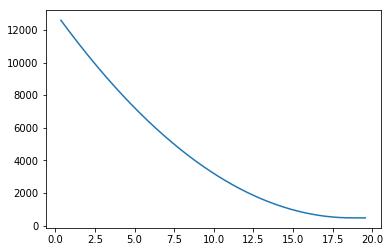

In [329]:
xlist=[]
ylist=[]
for step in range(100001):
    sess.run(train)
    xlist.append(sess.run(w)[0])
    ylist.append(sess.run(cost))
    if step%1000==0:
        print(sess.run(cost),sess.run(w),sess.run(b))
        
plt.plot(xlist,ylist)
plt.plot

In [330]:
del xlist
del ylist
del sess